# Problem Statement

A young entrepreneur in New York city is wanting to open a mobile pest control business with a strong focus on food industry. The business concept is chosen to have employees travelling to the customers by escooters or ebikes allowing for extra savings on fleet and travel time as well as other costs associated. However a basic requirement for storage and cleaning facilities are stated as follows :
- The location for the base needs to be chosen as closely to the most of the job locations as possible
- Location detailed down to a neighborhood level
***
 Essentiality of this report is in the tight competition between major pest control firms in NYC which are monopolizing the areas. 
That's why this report will play a vital role to help our customer to try and use the competitive advantage of a zero fleet operational approach.
***
### The task will involve some exploratory analysis of Food Venues in NY as well as the potential in the services required.
***
The final results will be used for other pest control businesses with a different set of requirements but also specialiased in Food Businesses. This report is targeted to help the Restaurant owners to identify potential areas suitable to open a bar or cafe.
***

# DATA

## Dataset 1

The data we are going to use is a Foursquare API data retieval consisting of venues and categories of venues in the whole New York city.
Contains the following fields :
-   name
-   categories
-   lat
-   lng

Sample : 
***
name	            categories	        lat	                lng


0	Lollipops Gelato	Dessert Shop	40.894123	-73.845892
1	Rite Aid	        Pharmacy	    40.896649	-73.844846
2	Carvel Ice Cream	Ice Cream Shop	40.890487	-73.848568
3	Walgreens	        Pharmacy	    40.896528	-73.844700
4	Dunkin'	            Donut Shop	    40.890459	-73.84908

***
* We are going build the hot encoded table and count the values for each Neoghborhood therefore we are not much concerned with the geo data



## Dataset 2

The second dataset is a NYC Rat Sightings dataset freely available on https://www.kaggle.com/new-york-city/nyc-rat-sightings

New York City rodent complaints can be made online, or by dialing 3-1-1, and the New York City guide Preventing Rats on Your Property discusses how the New York City Health Department inspects private and public properties for rats. Property owners that fail inspections receive a Commissioner's Order and have five days to correct the problem. If after five days the property fails a second inspection, the owner receives a Notice of Violation and can be fined. The property owner is billed for any clean-up or extermination carried out by the Health Department.

Data is from 2010-Sept 16th, 2017 and includes date, location (lat/lon), type of structure, borough, and community board.


Contains the fields :
Unique Key	Created Date	Closed Date	Agency	Agency Name	Complaint Type	Descriptor	Location Type	Incident Zip	Incident Address	Street Name	Cross Street 1	Cross Street 2	Intersection Street 1	Intersection Street 2	Address Type	City	Landmark	Facility Type	Status	Due Date	Resolution Action Updated Date	Community Board	Borough	X Coordinate (State Plane)	Y Coordinate (State Plane)	Park Facility Name	Park Borough	School Name	School Number	School Region	School Code	School Phone Number	School Address	School City	School State	School Zip	School Not Found	School or Citywide Complaint	Vehicle Type	Taxi Company Borough	Taxi Pick Up Location	Bridge Highway Name	Bridge Highway Direction	Road Ramp	Bridge Highway Segment	Garage Lot Name	Ferry Direction	Ferry Terminal Name	Latitude	Longitude	Location

### We only use the fields of Borough and count the grouped values

## Dataset 3

New York Borough data in JSON format
Contains : 
- Borough 
- Neighborhood
- lat
- lng

## Dataset 4.
Obtained via a webscraping technique from the website (https://www.nycbynatives.com/nyc_info/new_york_city_zip_codes.php)

NYC zip codes for each Borough. Contains :
- Borough
- ZIP

Cleaned sample:
***
    zip	    borough

0	10001	Manhattan
1	10002	Manhattan
2	10003	Manhattan
3	10004	Manhattan
4	10005	Manhattan
***
We will use this table to join it on zip with the rat sightings table

# Methodology

As the methodology we chose to combine the data from the New York city Neighborhoods geo information and utilize a Foursquare API to get the list of venues in each neighborhood .
Consequtively we performed some analysis on the resulting data table to select only food related venues from the whole list followed by grouping it and combining into total Food Venues for Borough and Neighborhood.
We had to utilize the NYC zipcodes to join the two tables on the zip code to get the resulting table of rat sightings and food venues.
As the main KPI for the business problem we chose the ratio of Rats sightings for each venue and borough. 
A sorting technique was performed to sort the results so that we have a descending table.

Installing necessary tools and libraries


In [12]:
!pip install geopy
!pip install folium
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

You should consider upgrading via the 'c:\users\vlad\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.
Libraries imported.
You should consider upgrading via the 'c:\users\vlad\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


Importing Borough Data

In [13]:
!wget -q -O 'newyork_data.json' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json
print('Data downloaded!')
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

Data downloaded!
'wget' is not recognized as an internal or external command,
operable program or batch file.


In [14]:
neighborhoods_data = newyork_data['features']

Building a data table to be used for a Foursquare request

In [15]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [16]:
neighborhoods.head()

Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643
4   Bronx    Riverdale  40.890834 -73.912585

In [17]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


Performing API request

In [18]:
CLIENT_ID = 'AMC2NPNAU5FSBJGPRIRX0LAD403USWQIKAULCLTTWTA4GQ1A' # your Foursquare ID
CLIENT_SECRET = 'D45A1YSE1Z3NZFTJJAL0IDFE35XWBKOA4SXIF1EF5C4520WT' # your Foursquare Secret
VERSION = '20210601' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: AMC2NPNAU5FSBJGPRIRX0LAD403USWQIKAULCLTTWTA4GQ1A
CLIENT_SECRET:D45A1YSE1Z3NZFTJJAL0IDFE35XWBKOA4SXIF1EF5C4520WT


In [19]:
neighborhood_latitude = neighborhoods.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = neighborhoods.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = neighborhoods.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Wakefield are 40.89470517661, -73.84720052054902.


In [20]:
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=AMC2NPNAU5FSBJGPRIRX0LAD403USWQIKAULCLTTWTA4GQ1A&client_secret=D45A1YSE1Z3NZFTJJAL0IDFE35XWBKOA4SXIF1EF5C4520WT&v=20210601&ll=40.89470517661,-73.84720052054902&radius=500&limit=100'

RESULTS FROM API:

In [21]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60b54d4778d1ac301d819f87'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Wakefield',
  'headerFullLocation': 'Wakefield, Bronx',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 9,
  'suggestedBounds': {'ne': {'lat': 40.899205181110005,
    'lng': -73.84125857127495},
   'sw': {'lat': 40.89020517211, 'lng': -73.8531424698231}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c537892fd2ea593cb077a28',
       'name': 'Lollipops Gelato',
       'location': {'address': '4120 Baychester Ave',
        'crossStreet': 'Edenwald & Bussing Ave',
        'lat': 40.894123150205274,
        'lng': -73.84589162362325,
        'labeledLatLn

Defining function for building the venue table


In [22]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Results of the table:

In [23]:
venues = results['response']['groups'][0]['items']

    
nearby_venues = json_normalize(venues) # flatten JSON
nearby_venues
# # filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

<ipython-input-23-3d32d806770d>:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues) # flatten JSON


name      categories        lat        lng
0  Lollipops Gelato    Dessert Shop  40.894123 -73.845892
1          Rite Aid        Pharmacy  40.896649 -73.844846
2  Carvel Ice Cream  Ice Cream Shop  40.890487 -73.848568
3         Walgreens        Pharmacy  40.896528 -73.844700
4           Dunkin'      Donut Shop  40.890459 -73.849089

In [24]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

9 venues were returned by Foursquare.


Performing this function on each Neighborhood

In [25]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)
nearby_venues

name            categories        lat  \
0                     Lollipops Gelato          Dessert Shop  40.894123   
1                             Rite Aid              Pharmacy  40.896649   
2                     Carvel Ice Cream        Ice Cream Shop  40.890487   
3                            Walgreens              Pharmacy  40.896528   
4                              Dunkin'            Donut Shop  40.890459   
5  Cooler Runnings Jamaican Restaurant  Caribbean Restaurant  40.898083   
6                               Subway        Sandwich Place  40.890468   
7                         Central Deli         Deli / Bodega  40.896728   
8                      Koss Quick Wash            Laundromat  40.891281   

         lng  
0 -73.845892  
1 -73.844846  
2 -73.848568  
3 -73.844700  
4 -73.849089  
5 -73.850259  
6 -73.849152  
7 -73.844387  
8 -73.849904

In [26]:
ny_venues = getNearbyVenues(names=neighborhoods['Neighborhood'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude']
                                  )

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Marble Hill
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker

GROUPING AND COUNTING

In [48]:
ny_venues_filtered=ny_venues[ny_venues['Venue Category'].str.contains('Restaurant|Bar|pizza|bakery|taco|bbq', case=False)]


In [49]:
ny_venues_filtered.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
5     Wakefield              40.894705              -73.847201   
10   Co-op City              40.874294              -73.829939   
14   Co-op City              40.874294              -73.829939   
16   Co-op City              40.874294              -73.829939   
27  Eastchester              40.887556              -73.827806   

                                  Venue  Venue Latitude  Venue Longitude  \
5   Cooler Runnings Jamaican Restaurant       40.898083       -73.850259   
10                       Capri II Pizza       40.876374       -73.829940   
14                 Townhouse Restaurant       40.876086       -73.828868   
16                               Arby's       40.870411       -73.828606   
27                          Fish & Ting       40.885656       -73.829197   

          Venue Category  
5   Caribbean Restaurant  
10           Pizza Place  
14            Restaurant  
16  Fast Food Restaurant  
27  Caribbean Restaurant

In [27]:
ny_venues.groupby('Neighborhood').count()

Park Hill                      7               7                7   
Park Slope                    64              64               64   
Parkchester                   32              32               32   
Pelham Bay                    39              39               39   
Pelham Gardens                19              19               19   
Pelham Parkway                24              24               24   
Pleasant Plains               17              17               17   
Pomonok                        9               9                9   
Port Ivory                     2               2                2   
Port Morris                   11              11               11   
Port Richmond                  6               6                6   
Prince's Bay                  10              10               10   
Prospect Heights              83              83               83   
Prospect Lefferts Gardens     51              51               51   
Prospect Park South           51              51               51   
Queens Village                19              19               19   
Queensboro Hill               22              22               22   
Queensbridge                  13              13               13   
Randall Manor                  6               6                6   
Ravenswood                    27              27               27   
Red Hook                      50              50               50   
Rego Park                     40              40               40   
Remsen Village                15              15               15   
Richmond Hill                 23              23               23   
Richmond Town                  4               4                4   
Richmond Valley               11              11               11   
Ridgewood                     38              38               38   
Riverdale                     12              12               12   
Rochdale                      16              16               16   
Rockaway Beach                46              46               46   
Rockaway Park                 26              26               26   
Roosevelt Island              27              27               27   
Rosebank                      26              26               26   
Rosedale                      13              13               13   
Rossville                     14              14               14   
Roxbury                        7               7                7   
Rugby                         18              18               18   
Sandy Ground                  11              11               11   
Schuylerville                 16              16               16   
Sea Gate                       7               7                7   
Sheepshead Bay                26              26               26   
Shore Acres                   26              26               26   
Silver Lake                    5               5                5   
Soho                         100             100              100   
Somerville                     1               1                1   
Soundview                     16              16               16   
South Beach                    9               9                9   
South Jamaica                  8               8                8   
South Ozone Park              14              14               14   
South Side                   100             100              100   
Springfield Gardens           18              18               18   
Spuyten Duyvil                11              11               11   
St. Albans                    20              20               20   
St. George                    33              33               33   
Stapleton                     30              30               30   
Starrett City                 10              10               10   
Steinway                      23              23               23   
Stuyvesant Town               21              21               21  

In [28]:
print('There are {} uniques categories.'.format(len(ny_venues['Venue Category'].unique())))

There are 435 uniques categories.


We do one hot Encoding to calculate and descriminate against non-food related venues

In [29]:
# one hot encoding
ny_venues_onehot = pd.get_dummies(ny_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
ny_venues_onehot['Neighborhood'] = ny_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [ny_venues_onehot.columns[-1]] + list(ny_venues_onehot.columns[:-1])
ny_venues_onehot = ny_venues_onehot[fixed_columns]
ny_venues_onehot.set_index('Neighborhood')

ny_venues_onehot.head()

0               0                     0   
2               0               0                     0   
3               0               0                     0   
4               0               0                     0   

   Mediterranean Restaurant  Memorial Site  Men's Store  Metro Station  \
0                         0              0            0              0   
1                         0              0            0              0   
2                         0              0            0              0   
3                         0              0            0              0   
4                         0              0            0              0   

   Mexican Restaurant  Middle Eastern Restaurant  Mini Golf  \
0                   0                          0          0   
1                   0                          0          0   
2                   0                          0          0   
3                   0                          0          0   
4                   0                          0          0   

   Miscellaneous Shop  Mobile Phone Shop  Modern European Restaurant  \
0                   0                  0                           0   
1                   0                  0                           0   
2                   0                  0                           0   
3                   0                  0                           0   
4                   0                  0                           0   

   Molecular Gastronomy Restaurant  Monument / Landmark  Moroccan Restaurant  \
0                                0                    0                    0   
1                                0                    0                    0   
2                                0                    0                    0   
3                                0                    0                    0   
4                                0                    0                    0   

   Motel  Motorcycle Shop  Movie Theater  Moving Target  Multiplex  Museum  \
0      0                0              0              0          0       0   
1      0                0              0              0          0       0   
2      0                0              0              0          0       0   
3      0                0              0              0          0       0   
4      0                0              0              0          0       0   

   Music School  Music Store  Music Venue  Nail Salon Neighborhood  \
0             0            0            0           0    Wakefield   
1             0            0            0           0    Wakefield   
2             0            0            0           0    Wakefield   
3             0            0            0           0    Wakefield   
4             0            0            0           0    Wakefield   

   New American Restaurant  Newsstand  Nightclub  Nightlife Spot  Non-Profit  \
0                        0          0          0               0           0   
1                        0          0          0               0           0   
2                        0          0          0               0           0   
3                        0          0          0               0           0   
4                        0          0          0               0           0   

   Noodle House  North Indian Restaurant  Office  Opera House  Optical Shop  \
0             0                        0       0            0             0   
1             0                        0       0            0             0   
2             0                        0       0            0             0   
3             0                        0       0            0             0   
4             0                        0       0            0             0   

   Organic Grocery  Other Great Outdoors  Other Nightlife  Other Repair Shop  \
0                0                     0                0                  0   
1                0                 

In [30]:
ny_venues_onehot1=ny_venues_onehot.groupby(by='Neighborhood', axis=0).sum()
ny_venues_onehot1.head()

0            0          0   
Annadale                                  0         0            0          0   
Arden Heights                             0         0            0          0   
Arlington                                 0         0            0          0   
Arrochar                                  0         0            0          0   

               Pharmacy  Photography Studio  Physical Therapist  Piano Bar  \
Neighborhood                                                                 
Allerton              2                   0                   0          0   
Annadale              1                   0                   0          0   
Arden Heights         1                   0                   0          0   
Arlington             0                   0                   0          0   
Arrochar              0                   0                   0          0   

               Pie Shop  Pier  Piercing Parlor  Pilates Studio  Pizza Place  \
Neighborhood                                                                  
Allerton              0     0                0               0            5   
Annadale              0     0                0               0            2   
Arden Heights         0     0                0               0            1   
Arlington             0     0                0               0            0   
Arrochar              0     0                0               0            3   

               Platform  Playground  Plaza  Poke Place  Polish Restaurant  \
Neighborhood                                                                
Allerton              0           1      0           0                  0   
Annadale              0           0      0           0                  0   
Arden Heights         0           0      0           0                  0   
Arlington             0           0      0           0                  0   
Arrochar              0           0      0           0                  1   

               Pool  Pool Hall  Post Office  Print Shop  \
Neighborhood                                              
Allerton          0          0            0           0   
Annadale          0          0            0           0   
Arden Heights     0          0            0           0   
Arlington         0          0            0           0   
Arrochar          0          0            0           0   

               Professional & Other Places  Pub  Public Art  \
Neighborhood                                                  
Allerton                                 0    0           0   
Annadale                                 0    0           0   
Arden Heights                            0    0           0   
Arlington                                0    0           0   
Arrochar                                 0    0           0   

               Puerto Rican Restaurant  Racetrack  Ramen Restaurant  \
Neighborhood                                                          
Allerton                             0          0                 0   
Annadale                             0          0                 0   
Arden Heights                        0          0                 0   
Arlington                            0          0                 0   
Arrochar                             0          0                 0   

               Record Shop  Recording Studio  Recreation Center  \
Neighborhood                                                      
Allerton                 0                 0                  0   
Annadale                 0                 0                  0   
Arden Heights            0                 0                  0   
Arlington                0                 0                  0   
Arrochar                 0                 0                  0   

               Rental Car Location  Rental Service  \
Neighborhood                                         
Allerton                         0               0   
Annadale           

In [31]:
ny_food = ny_venues_onehot1.loc[:, ny_venues_onehot1.columns.str.contains('Restaurant|Bar|pizza|bakery|taco|bbq', case=False)]
ny_food.head()

0                   0                    1   
Arrochar                       0                   0                    0   

               Arepa Restaurant  Argentinian Restaurant  Asian Restaurant  \
Neighborhood                                                                
Allerton                      0                       0                 0   
Annadale                      0                       0                 0   
Arden Heights                 0                       0                 0   
Arlington                     0                       0                 0   
Arrochar                      0                       0                 0   

               Australian Restaurant  Austrian Restaurant  BBQ Joint  Bakery  \
Neighborhood                                                                   
Allerton                           0                    0          0       1   
Annadale                           0                    0          0       1   
Arden Heights                      0                    0          0       0   
Arlington                          0                    0          0       0   
Arrochar                           0                    0          0       0   

               Bar  Beach Bar  Beer Bar  Brazilian Restaurant  \
Neighborhood                                                    
Allerton         0          0         0                     0   
Annadale         0          0         0                     0   
Arden Heights    0          0         0                     0   
Arlington        0          0         0                     0   
Arrochar         0          0         0                     0   

               Burmese Restaurant  Cajun / Creole Restaurant  \
Neighborhood                                                   
Allerton                        0                          0   
Annadale                        0                          0   
Arden Heights                   0                          0   
Arlington                       0                          0   
Arrochar                        0                          0   

               Cantonese Restaurant  Caribbean Restaurant  \
Neighborhood                                                
Allerton                          0                     0   
Annadale                          0                     0   
Arden Heights                     0                     0   
Arlington                         0                     0   
Arrochar                          0                     0   

               Caucasian Restaurant  Chinese Restaurant  Cocktail Bar  \
Neighborhood                                                            
Allerton                          0                   3             0   
Annadale                          0                   0             0   
Arden Heights                     0                   0             0   
Arlington                         0                   0             0   
Arrochar                          0                   0             0   

               Colombian Restaurant  Comfort Food Restaurant  \
Neighborhood                                                   
Allerton                          0                        0   
Annadale                          0                        0   
Arden Heights                     0                        0   
Arlington                         0                        0   
Arrochar                          0                        0   

               Cuban Restaurant  Czech Restaurant  Dim Sum Restaurant  \
Neighborhood                                                            
Allerton                      0                 0                   0   
Annadale                      0                 0                   0   
Arden Heights                 0                 0                   0   
Arlington                     0                 0                   0   
Arrochar                      0            

In [32]:
ny_food_totals = ny_food.sum(axis=1)
ny_food_totals_df=ny_food_totals.to_frame()

Food venues in each Neighborhood

In [ ]:
ny_food_totals_df_gps = ny_food_totals_df.merge()

In [33]:
ny_food_totals_df.rename(columns={0:'Food_locs'})

Food_locs
Neighborhood                        
Allerton                          11
Annadale                           4
Arden Heights                      1
Arlington                          1
Arrochar                           8
Arverne                            4
Astoria                           58
Astoria Heights                    5
Auburndale                         6
Bath Beach                        20
Battery Park City                 12
Bay Ridge                         39
Bay Terrace                        9
Baychester                         4
Bayside                           37
Bayswater                          0
Bedford Park                      12
Bedford Stuyvesant                12
Beechhurst                         4
Bellaire                           3
Belle Harbor                       5
Bellerose                          8
Belmont                           46
Bensonhurst                       15
Bergen Beach                       0
Blissville                         3
Bloomfield                         0
Boerum Hill                       24
Borough Park                       6
Breezy Point                       0
Briarwood                          1
Brighton Beach                    15
Broad Channel                      2
Broadway Junction                  1
Bronxdale                          7
Brooklyn Heights                  31
Brookville                         0
Brownsville                        4
Bulls Head                        12
Bushwick                          30
Butler Manor                       0
Cambria Heights                    7
Canarsie                           2
Carnegie Hill                     36
Carroll Gardens                   46
Castle Hill                        1
Castleton Corners                  6
Central Harlem                    23
Charleston                         2
Chelsea                           37
Chinatown                         57
City Island                        9
City Line                         10
Civic Center                      36
Claremont Village                  6
Clason Point                       1
Clifton                            5
Clinton                           39
Clinton Hill                      48
Co-op City                         3
Cobble Hill                       45
College Point                     16
Concord                            1
Concourse                          9
Concourse Village                  9
Coney Island                       1
Corona                            10
Country Club                       0
Crown Heights                      5
Cypress Hills                     10
Ditmas Park                       16
Dongan Hills                      10
Douglaston                         6
Downtown                          40
Dumbo                             15
Dyker Heights                      0
East Elmhurst                      4
East Flatbush                      4
East Harlem                       22
East New York                      6
East Tremont                       8
East Village                      59
East Williamsburg                 27
Eastchester                        8
Edenwald                           0
Edgemere                           3
Edgewater Park                    13
Egbertville                        1
Elm Park                           3
Elmhurst                          26
Eltingville                       14
Emerson Hill                       0
Erasmus                            6
Far Rockaway                       8
Fieldston                          0
Financial District                38
Flatbush                           7
Flatiron                          41
Flatlands                          7
Floral Park                        3
Flushing                          29
Fordham                           19
Forest Hills                       9
Forest Hills Gardens               7
Fort Greene                       32
Fort Hamilton                     20
Fox Hills                      

Loading the Rat Sigthing Data

In [35]:
rats = pd.read_csv(r'Rat_Sightings.csv')

In [36]:
rats.head()

Unique Key            Created Date             Closed Date Agency  \
0    31464015  09/04/2015 12:00:00 AM  09/18/2015 12:00:00 AM  DOHMH   
1    31464024  09/04/2015 12:00:00 AM  10/28/2015 12:00:00 AM  DOHMH   
2    31464025  09/04/2015 12:00:00 AM                     NaN  DOHMH   
3    31464026  09/04/2015 12:00:00 AM  09/14/2015 12:00:00 AM  DOHMH   
4    31464027  09/04/2015 12:00:00 AM  09/22/2015 12:00:00 AM  DOHMH   

                               Agency Name Complaint Type    Descriptor  \
0  Department of Health and Mental Hygiene         Rodent  Rat Sighting   
1  Department of Health and Mental Hygiene         Rodent  Rat Sighting   
2  Department of Health and Mental Hygiene         Rodent  Rat Sighting   
3  Department of Health and Mental Hygiene         Rodent  Rat Sighting   
4  Department of Health and Mental Hygiene         Rodent  Rat Sighting   

                  Location Type  Incident Zip      Incident Address  \
0  3+ Family Mixed Use Building       10006.0                   NaN   
1           Commercial Building       10306.0  2270 HYLAN BOULEVARD   
2           1-2 Family Dwelling       10310.0       758 POST AVENUE   
3       3+ Family Apt. Building       11206.0    198 SCHOLES STREET   
4  3+ Family Mixed Use Building       10462.0   2138 WALLACE AVENUE   

       Street Name   Cross Street 1    Cross Street 2 Intersection Street 1  \
0              NaN              NaN               NaN         TRINITY PLACE   
1  HYLAN BOULEVARD              NaN               NaN                   NaN   
2      POST AVENUE      CARY AVENUE  GREENLEAF AVENUE                   NaN   
3   SCHOLES STREET  HUMBOLDT STREET   BUSHWICK AVENUE                   NaN   
4   WALLACE AVENUE     BRADY AVENUE      LYDIG AVENUE                   NaN   

  Intersection Street 2  Address Type           City Landmark  Facility Type  \
0         RECTOR STREET  INTERSECTION       NEW YORK      NaN            NaN   
1                   NaN       LATLONG  STATEN ISLAND      NaN            NaN   
2                   NaN       ADDRESS  STATEN ISLAND      NaN            NaN   
3                   NaN       ADDRESS       BROOKLYN      NaN            NaN   
4                   NaN       ADDRESS          BRONX      NaN            NaN   

     Status                Due Date Resolution Action Updated Date  \
0    Closed  10/04/2015 03:01:02 PM         09/18/2015 12:00:00 AM   
1    Closed  10/04/2015 10:02:58 AM         10/28/2015 12:00:00 AM   
2  Assigned  10/04/2015 11:58:02 AM         09/04/2015 12:03:49 PM   
3    Closed  10/04/2015 06:56:34 AM         09/14/2015 12:00:00 AM   
4    Closed  10/04/2015 10:08:27 AM         09/22/2015 12:00:00 AM   

             Community Board        Borough  X Coordinate (State Plane)  \
0               01 MANHATTAN      MANHATTAN                    980656.0   
1  Unspecified STATEN ISLAND  STATEN ISLAND                    955207.0   
2           01 STATEN ISLAND  STATEN ISLAND                    949033.0   
3                01 BROOKLYN       BROOKLYN                   1000550.0   
4                   11 BRONX          BRONX                   1021648.0   

   Y Coordinate (State Plane) Park Facility Name   Park Borough  School Name  \
0                    197137.0        Unspecified      MANHATTAN  Unspecified   
1                    148858.0        Unspecified  STATEN ISLAND  Unspecified   
2                    169278.0        Unspecified  STATEN ISLAND  Unspecified   
3                    197585.0        Unspecified       BROOKLYN  Unspecified   
4                    250489.0        Unspecified          BRONX  Unspecified   

  School Number School Region  School Code School Phone Number School Address  \
0   Unspecified   Unspecified  Unspecified         Unspecified    Unspecified   
1   Unspecified   Unspecified  Unspecified         Unspecified    Unspecified   
2   Unspecified   Unspecified  Unspecified         Unspecified    Unspecified   
3   Unspecified   Unspecified  Unspecified         Unspecif

In [40]:
import folium
def generateBaseMap(default_location=[40.707772, -74.012963], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map
from folium.plugins import HeatMap
base_map = generateBaseMap()
HeatMap(data=rats[['Latitude', 'Longitude']].groupby(['Latitude', 'Longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)


## Heatmap of Rats Sightings

In [41]:
base_map

In [50]:
base_map2 = generateBaseMap()
HeatMap(data=ny_venues_filtered[['Venue Latitude', 'Venue Longitude']].groupby(['Venue Latitude', 'Venue Longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map2)


## Heatmap of Food Venues

In [51]:
base_map2

In [37]:
zipsum=rats.groupby('Incident Zip').sum()

In [38]:
rats_sum = rats['Incident Zip'].value_counts()

In [39]:
!pip install bs4

You should consider upgrading via the 'c:\users\vlads\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [40]:
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page
import pandas as pd 

Web Scraping ZIP codes

In [41]:
url = "https://www.nycbynatives.com/nyc_info/new_york_city_zip_codes.php"
data  = requests.get(url).text
soup = BeautifulSoup(data,"html5lib")
tables = soup.find_all('table') # in html table is represented by the tag <table>
len(tables)

1

In [42]:
!pip install html5lib
!pip install lxml
!pip install beautifulSoup4

import html5lib
import lxml
from bs4 import BeautifulSoup
url = "https://www.nycbynatives.com/nyc_info/new_york_city_zip_codes.php"
dataframe_list = pd.read_html(url, flavor='bs4')

You should consider upgrading via the 'c:\users\vlads\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\vlads\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'c:\users\vlads\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [43]:
import html5lib
url = "https://www.nycbynatives.com/nyc_info/new_york_city_zip_codes.php"

In [44]:
dataframe_list = pd.read_html(url, flavor='bs4')

In [45]:
zip_all=dataframe_list[0]
        

In [47]:
zip_all
pd.options.display.max_rows = 20

In [48]:

zip1=zip_all.iloc[:,0:2]
zip2=zip_all.iloc[:,3:5]

In [49]:
zip2.rename(columns={3:'zip', 4:'borough'},inplace=True)

In [50]:
zip1.rename(columns={0:'zip', 1:'borough'},inplace=True)

In [51]:
zip_clean=pd.concat([zip1,zip2], axis=0)

We get the zip codes for each borough

In [52]:
zip_clean.set_index('zip')


borough
zip             
10001  Manhattan
10002  Manhattan
10003  Manhattan
10004  Manhattan
10005  Manhattan
...          ...
10309     Staten
10310     Staten
10311     Staten
10312     Staten
10314     Staten

[480 rows x 1 columns]

In [54]:
zip_clean.set_index('zip', drop=True,inplace=True)

In [55]:
zip_clean

borough
zip             
10001  Manhattan
10002  Manhattan
10003  Manhattan
10004  Manhattan
10005  Manhattan
...          ...
10309     Staten
10310     Staten
10311     Staten
10312     Staten
10314     Staten

[480 rows x 1 columns]

In [56]:
rats_sum_df=rats_sum.to_frame()

In [57]:
rats_sum_df

Incident Zip
11221.0          3124
11216.0          2494
10025.0          2285
11238.0          2158
11233.0          1925
...               ...
10271.0             1
1123.0              1
11242.0             1
11202.0             1
10174.0             1

[191 rows x 1 columns]

Data wrangling and cleaning

In [58]:
rats_sum_df.rename(columns={'Incident Zip':'Number', 'index':'zip'}, inplace=True)

In [60]:
zip1=zip_all.iloc[:,0:2]
zip2=zip_all.iloc[:,3:5]

In [61]:
zip2.rename(columns={3:'zip', 4:'borough'},inplace=True)

In [62]:
zip1.rename(columns={0:'zip', 1:'borough'},inplace=True)

In [63]:
zip_clean=pd.concat([zip1,zip2], axis=0)

In [64]:
zip_clean.head()

zip    borough
0  10001  Manhattan
1  10002  Manhattan
2  10003  Manhattan
3  10004  Manhattan
4  10005  Manhattan

In [65]:
rats_sum1=rats_sum.to_frame()
rats_sum1.reset_index(inplace=True)
rats_sum1.head()

index  Incident Zip
0  11221.0          3124
1  11216.0          2494
2  10025.0          2285
3  11238.0          2158
4  11233.0          1925

In [66]:
rats_sum1.rename(columns={'Incident Zip':'Number', 'index':'zip'}, inplace=True)

In [68]:
rats_sum1=rats_sum1.astype(int)
rats_sum1.head()

zip  Number
0  11221    3124
1  11216    2494
2  10025    2285
3  11238    2158
4  11233    1925

In [85]:
rats_data=rats_sum1.merge(zip_clean, on='zip', how='right')

In [70]:
merged_geo_food=ny_food_totals_df.merge(neighborhoods, on='Neighborhood', how='right')

In [99]:
rats_data.drop_duplicates(subset=['zip','borough'], keep='first')
rats_final=rats_data.groupby('borough').agg({'Number':'sum'}).reset_index()

In [100]:

rats_final

borough   Number
0      Bronx  41332.0
1   Brooklyn  69136.0
2  Manhattan  52352.0
3     Queens  29412.0
4     Staten   9792.0

In [101]:
rats_final.rename(columns={'borough' :'Borough'}, inplace=True)
borough_venues=merged_geo_food.groupby('Borough').sum()


Neighborhood     0        Borough   Latitude  Longitude   Number
0       Wakefield   0.0          Bronx  40.894705 -73.847201  41332.0
1      Co-op City   4.0          Bronx  40.874294 -73.829939  41332.0
2     Eastchester   7.0          Bronx  40.887556 -73.827806  41332.0
3       Fieldston   0.0          Bronx  40.895437 -73.905643  41332.0
4       Riverdale   0.0          Bronx  40.890834 -73.912585  41332.0
..            ...   ...            ...        ...        ...      ...
301  Hudson Yards  20.0      Manhattan  40.756658 -74.000111  52352.0
302       Hammels   1.0         Queens  40.587338 -73.805530  29412.0
303     Bayswater   0.0         Queens  40.611322 -73.765968  29412.0
304  Queensbridge   3.0         Queens  40.756091 -73.945631  29412.0
305     Fox Hills   2.0  Staten Island  40.617311 -74.081740      NaN

[306 rows x 6 columns]

In [108]:
foodrats_merged.rename(columns={0:'Food Venues', 'Number':'RatsNum'},inplace=True)

In [118]:
foodrats_merged


Neighborhood Food Venues        Borough   Latitude  Longitude RatsNum
0       Wakefield           0          Bronx  40.894705 -73.847201   41332
1      Co-op City           4          Bronx  40.874294 -73.829939   41332
2     Eastchester           7          Bronx  40.887556 -73.827806   41332
3       Fieldston           0          Bronx  40.895437 -73.905643   41332
4       Riverdale           0          Bronx  40.890834 -73.912585   41332
..            ...         ...            ...        ...        ...     ...
301  Hudson Yards          20      Manhattan  40.756658 -74.000111   52352
302       Hammels           1         Queens  40.587338 -73.805530   29412
303     Bayswater           0         Queens  40.611322 -73.765968   29412
304  Queensbridge           3         Queens  40.756091 -73.945631   29412
305     Fox Hills           2  Staten Island  40.617311 -74.081740        

[306 rows x 6 columns]

In [112]:
foodrats_merged_clean=foodrats_merged.loc[:,['Neighborhood', 'Food Venues','Borough','RatsNum']]

In [120]:
nan_value = float("NaN")

foodrats_merged_clean.dropna(subset = ["RatsNum",'Food Venues'], inplace=True)

In [123]:
cols = ['Food Venues', 'RatsNum']
for col in cols:
    foodrats_merged_clean[col] = foodrats_merged_clean[col].apply(lambda x: int(x) if x == x else "")
    

In [126]:
foodrats_merged_clean=foodrats_merged_clean.drop_duplicates(subset=['Neighborhood'])

Final data table of the Pest data and Food venues

In [128]:
foodrats_merged_clean.sort_values(by=['Food Venues','RatsNum'], ascending=False)

Neighborhood  Food Venues    Borough  RatsNum
115      Murray Hill           79  Manhattan    52352
118     East Village           60  Manhattan    52352
129          Astoria           58     Queens    29412
97        South Side           57   Brooklyn    69136
100        Chinatown           57  Manhattan    52352
..               ...          ...        ...      ...
183  Jamaica Estates            0     Queens    29412
192       Somerville            0     Queens    29412
193       Brookville            0     Queens    29412
294            Malba            0     Queens    29412
303        Bayswater            0     Queens    29412

[242 rows x 4 columns]

Performing the Ratio calculation

In [ ]:
foodrats_merged_clean['Venue Rat Ratio'] = (foodrats_merged_clean['Food Venues'] / foodrats_merged_clean['RatsNum']) * 1000
resultdf=foodrats_merged_clean.sort_values(by='Venue Rat Ratio', ascending=False).head(5)

Error: Session cannot generate requests

# Results

As we can see in the final results  the most pest infested and food business dense areas are Astoria and Sunnyside Gardens

<BarContainer object of 5 artists>

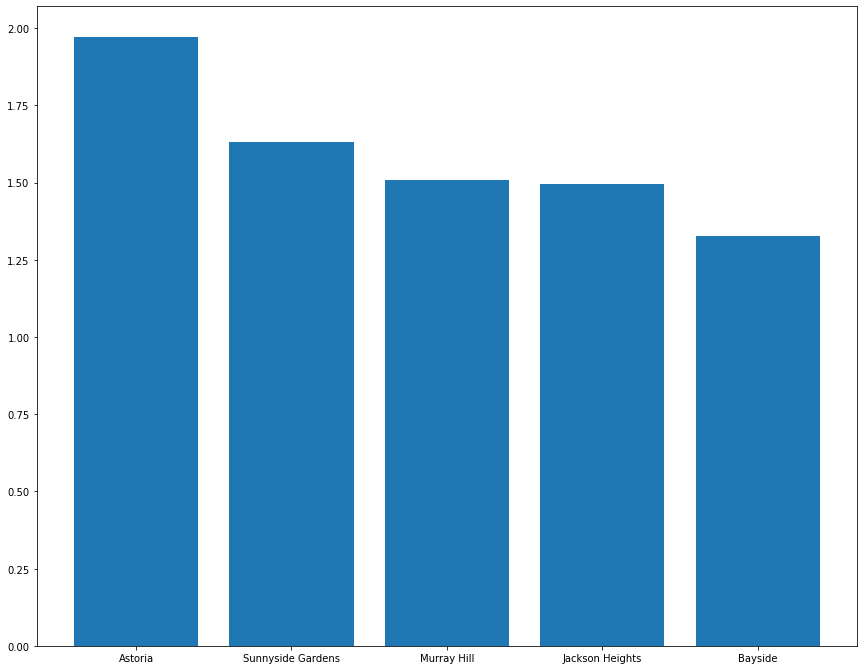

In [155]:
import matplotlib.pyplot as plt
names = resultdf['Neighborhood']
values = resultdf['Venue Rat Ratio']

plt.figure(figsize=(50, 40))

plt.subplot(333)
plt.bar(names, values)

# Discussion

During the data mining we have discovered that Queens, Manhattan and Bronx have the most food venues with most pests sigthed.
However after performing some data analysis purely on the rats data we found that Brooklyn is the most infested Borough. However our business problem was to prioritize the food venues which made the Neighborhood of Astoria that is part of Queens our top suggestion.
Manhattan is also very much affected by the pests which made Murray Hill into top 3 neighborhood option.


# Conclusion

It is clearly seen that Astoria has a almost a 2 point score in our chosen KPI for the pest rating which means that for the unit of food venue it has most pests observed and indicates an apparent business opportunity for our customer. Also it indicates for potential food business owners to avoid Manhattan and Queens for food safety compiance purposes